In [5]:
from random import random, choice
import pandas as pd
%matplotlib inline

In [3]:
random()

0.37533311394970725

In [16]:
choice([0,1])

1

# The soda can machine

The are playing i soda machine. 1 dollar provides a 50 % chance of getting a soda can. They all start with 20 dollars each and play.

In [18]:
people = "Adam Ketil Arild Damian Ryan Kyle Robert Mick Peter Carl".split()

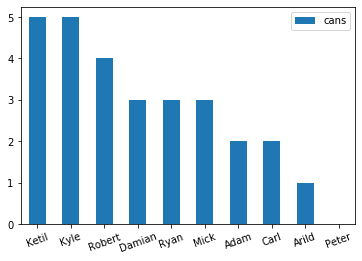

In [782]:
startamount = 5
players = {player: {'cans':sum([choice([0,1]) for i in range(startamount)])} for player in people}
pd.DataFrame(players).transpose().sort_values(by='cans', ascending = False).plot(kind='bar', rot=20)

# Long run

They all put money in the pot, which is awarded to one of them so that each has an equal chance of winning.
$\sum_{i=1}^{4}{i}$

## function for playing som rounds

In [642]:
def play(board, rounds = 50):
    for i in range(rounds):
        players = [x for x in board if board[x] > 0]
        for x in players:
            board[x] -= 1
        winner = choice(players)
        board[winner] += len(players)
    return board

def play_with_social_security(board, rounds = 50, security = 10):
    for i in range(rounds):
        for p in board:
            if board[p] == 0:
                board[p] = security
        for x in board:
            board[x] -= 1
        winner = choice([x for x in board])
        board[winner] += len(board)
    return board

# Initialize the players

In [801]:
start_amount = 10
board = {player: start_amount for player in people}

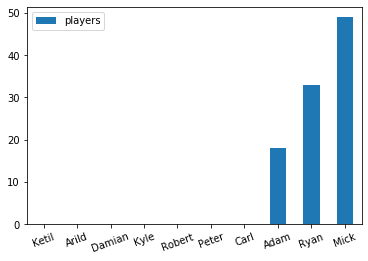

In [798]:
board = play(board, 20)
pd.DataFrame.from_dict(board, orient='index', columns =['players']).sort_values(by='players').plot(kind='bar', rot=20);

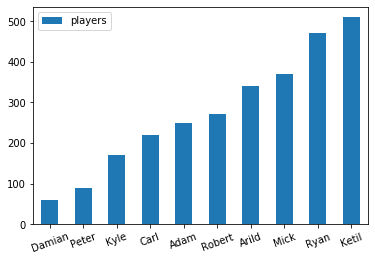

In [807]:
board = play_with_social_security(board, 20000, 10)
pd.DataFrame.from_dict(board, orient='index', columns =['players']).sort_values(by='players').plot(kind='bar', rot=20)

# Add money to all players after a while

In [810]:
added_amount = 10
board = {x:board[x] + added_amount for x in board}

# Two players with large stacks

In this scenario there are two players with an equal chance of winning. The ratio of wins vs.losses will converge to one, but the difference grows larger, or will oscillate with a higher amplitude.
Her we simply throw a coin and tally up wins, and calucalte wins vs. losses.

In [816]:
def heads_up_play(rounds):
    ratio = []
    diff = []
    until = rounds
    s = 0
    wins = 0
    for i in range(0, until):
        s = choice([0,1])
        wins += s
        losses = i - wins
        diff.append(wins - losses)
        try:
            ratio.append(wins/losses)
        except:
            ratio.append(0)

    df = pd.DataFrame()
    df['diff'] = diff
    df['ratio'] = ratio
    return df

In [820]:
df = heads_up_play(200)

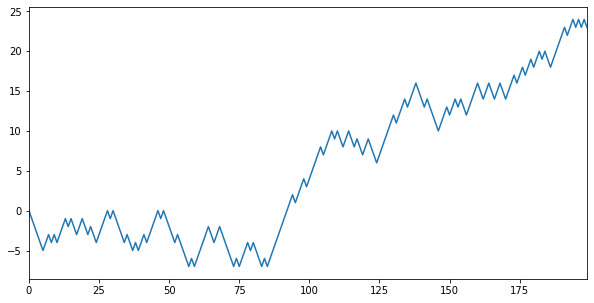

In [821]:
df['diff'].plot(figsize=(10,5))

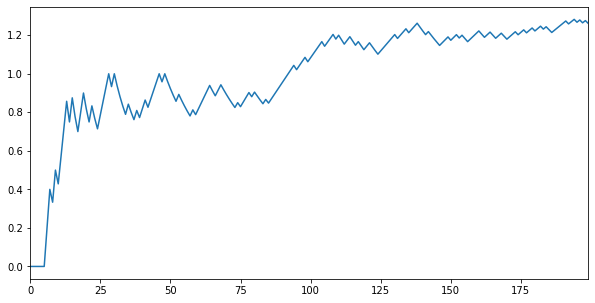

In [822]:
df['ratio'].plot(figsize=(10,5))

In [823]:
df

,diff,ratio
0,0,0.000000
1,-1,0.000000
2,-2,0.000000
3,-3,0.000000
4,-4,0.000000
...,...,...
195,23,1.267442
196,24,1.279070
197,23,1.264368
198,24,1.275862
